__**Table of Contents**__
====

>#### [1/17/2019](#1172019)

<a id='1172019'></a>

1/17/2019
====

>### We have been given all of Jeff Munn's obervation data.  Below I open a single observation file as a test of whether it has downloaded correctly.  Jeff included a python script for loading the H5 files in the data set.  I load the script as a module below and test some of the functions Jeff included in his readme file.

In [1]:
import basic
t = basic.Catalog.read('g17d028.006')

C:\Users\shebe\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [6]:
t.fields()

epoch                            float64                None
ra                               float64                None
e_ra                             float32                None
de                               float64                None
e_de                             float32                None
objID                            int64                  None
objInfoFlag                      int32                  None
qualityFlag                      int16                  None
nStackDetections                 int16                  None
nDetections                      int16                  None
ng                               int16                  None
g                                float32                None
e_g                              float32                None
gStd                             float32                None
gNpt                             int16                  None
gMin                             float32                None
gMax                    

In [5]:
g_extinct = t.extinction_correct('g')

In [4]:
basic.Catalog.color_color_many('g12d01*')

C:\Users\shebe\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


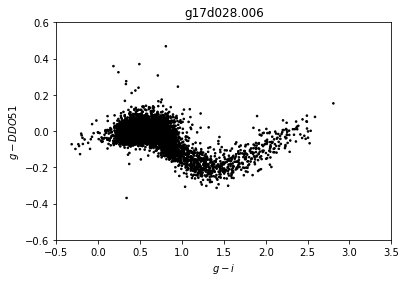

In [9]:
import matplotlib.pyplot as plt
t.color_color()
plt.show()

>### Line 77 in basic.py had to be changed to self.image = data['image'][0]

<a id='1192019'></a>

1/19/2019
====

>### Below I another DDO51 catalog, and I will test how Jeff's calibration compares to mine.

In [10]:
#Load modules
import basic
from astropy.io import fits
import numpy as np
from astropy.table import Table

>### I will load the data as calibrated by Munn in the same color-color space I used when calibrating in November of 2018.

C:\Users\shebe\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in less


<IPython.core.display.Javascript object>


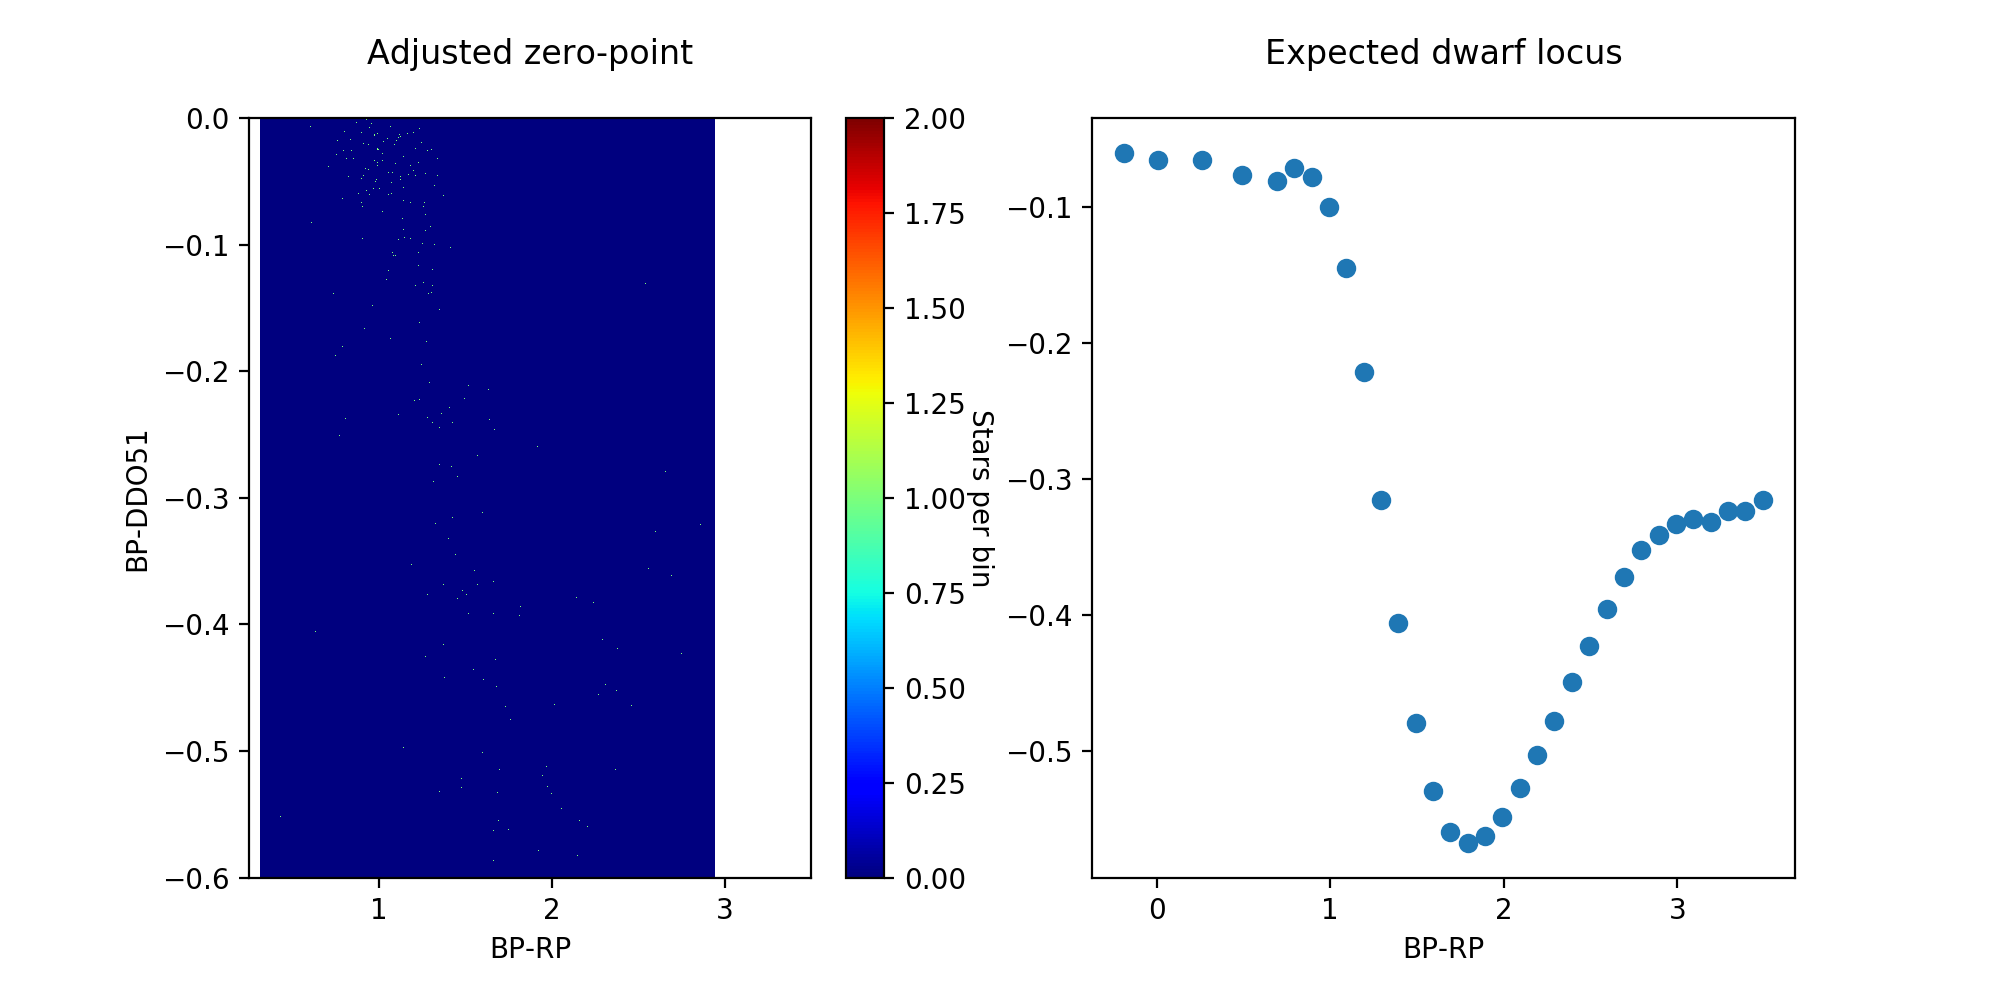

In [24]:
%matplotlib nbagg

#Load in Munn observation data
t = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\2017\g17d028\pcat\g17d028.006.h5')

#Load in expected dwarf locus
dat = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\gaiad51_dwarflocus.fits')

#Calculate differences between photometric bands
bprp = t['phot_bp_mean_mag']-t['phot_rp_mean_mag']
bpd = t['phot_bp_mean_mag']-t['ddo51']

#Create array with desired photometric data
dt = np.dtype([('bprp',float),('bpd',float)])
phot = np.zeros(len(t), dtype=dt)
phot['bprp'] = bprp
phot['bpd'] = bpd

#Remove bad values (equal to zero or greater than 100)
good = np.where((phot['bprp']<3)&(phot['bpd']<5)&(phot['bprp']!=0)&(phot['bpd']!=0))
phot = phot[good]

x = phot['bprp']
y = phot['bpd']

plt.subplot(1, 2, 1)
plt.hist2d(x, y, (2000, 2000), cmap=plt.cm.jet)
cbar = plt.colorbar()
cbar.set_label('Stars per bin', rotation=270, labelpad=10)
plt.xlabel('BP-RP')
plt.ylabel('BP-DDO51')
plt.xlim(0.25,3.5)
plt.ylim(-0.6,0)
plt.title('Adjusted zero-point', y=1.05)

plt.subplot(1, 2, 2)
plt.plot(dat['BPRP'],dat['BPD'],'o')
plt.xlabel('BP-RP')
plt.title('Expected dwarf locus', y=1.05)

plt.show()

C:\Users\shebe\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in less


<IPython.core.display.Javascript object>


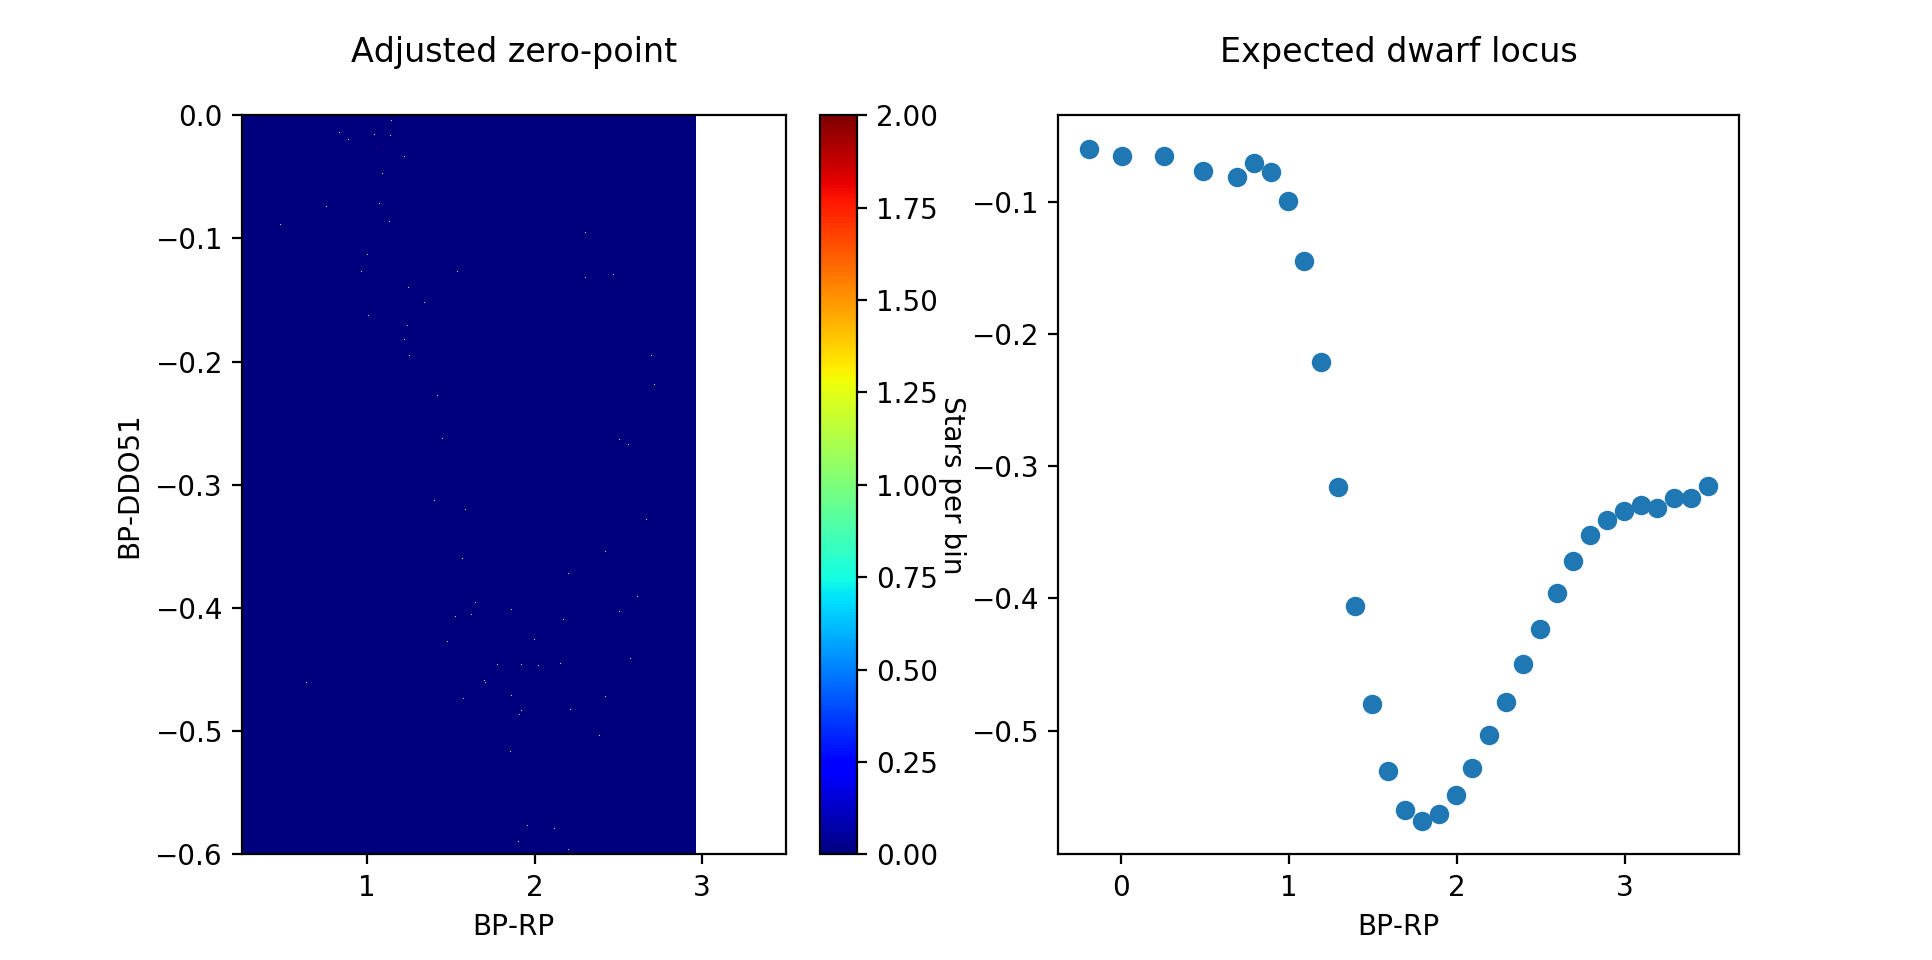

In [25]:
%matplotlib nbagg

#Load in Munn observation data
t = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\2017\g17d028\pcat\g17d028.003.h5')

#Load in expected dwarf locus
dat = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\gaiad51_dwarflocus.fits')

#Calculate differences between photometric bands
bprp = t['phot_bp_mean_mag']-t['phot_rp_mean_mag']
bpd = t['phot_bp_mean_mag']-t['ddo51']

#Create array with desired photometric data
dt = np.dtype([('bprp',float),('bpd',float)])
phot = np.zeros(len(t), dtype=dt)
phot['bprp'] = bprp
phot['bpd'] = bpd

#Remove bad values (equal to zero or greater than 100)
good = np.where((phot['bprp']<3)&(phot['bpd']<5)&(phot['bprp']!=0)&(phot['bpd']!=0))
phot = phot[good]

x = phot['bprp']
y = phot['bpd']

plt.subplot(1, 2, 1)
plt.hist2d(x, y, (2000, 2000), cmap=plt.cm.jet)
cbar = plt.colorbar()
cbar.set_label('Stars per bin', rotation=270, labelpad=10)
plt.xlabel('BP-RP')
plt.ylabel('BP-DDO51')
plt.xlim(0.25,3.5)
plt.ylim(-0.6,0)
plt.title('Adjusted zero-point', y=1.05)

plt.subplot(1, 2, 2)
plt.plot(dat['BPRP'],dat['BPD'],'o')
plt.xlabel('BP-RP')
plt.title('Expected dwarf locus', y=1.05)

plt.show()

>### It is difficult to discern a pattern with these few stars.  I will merge multiple exposures for a night into a single table and then run the same process.

C:\Users\shebe\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in less


<IPython.core.display.Javascript object>


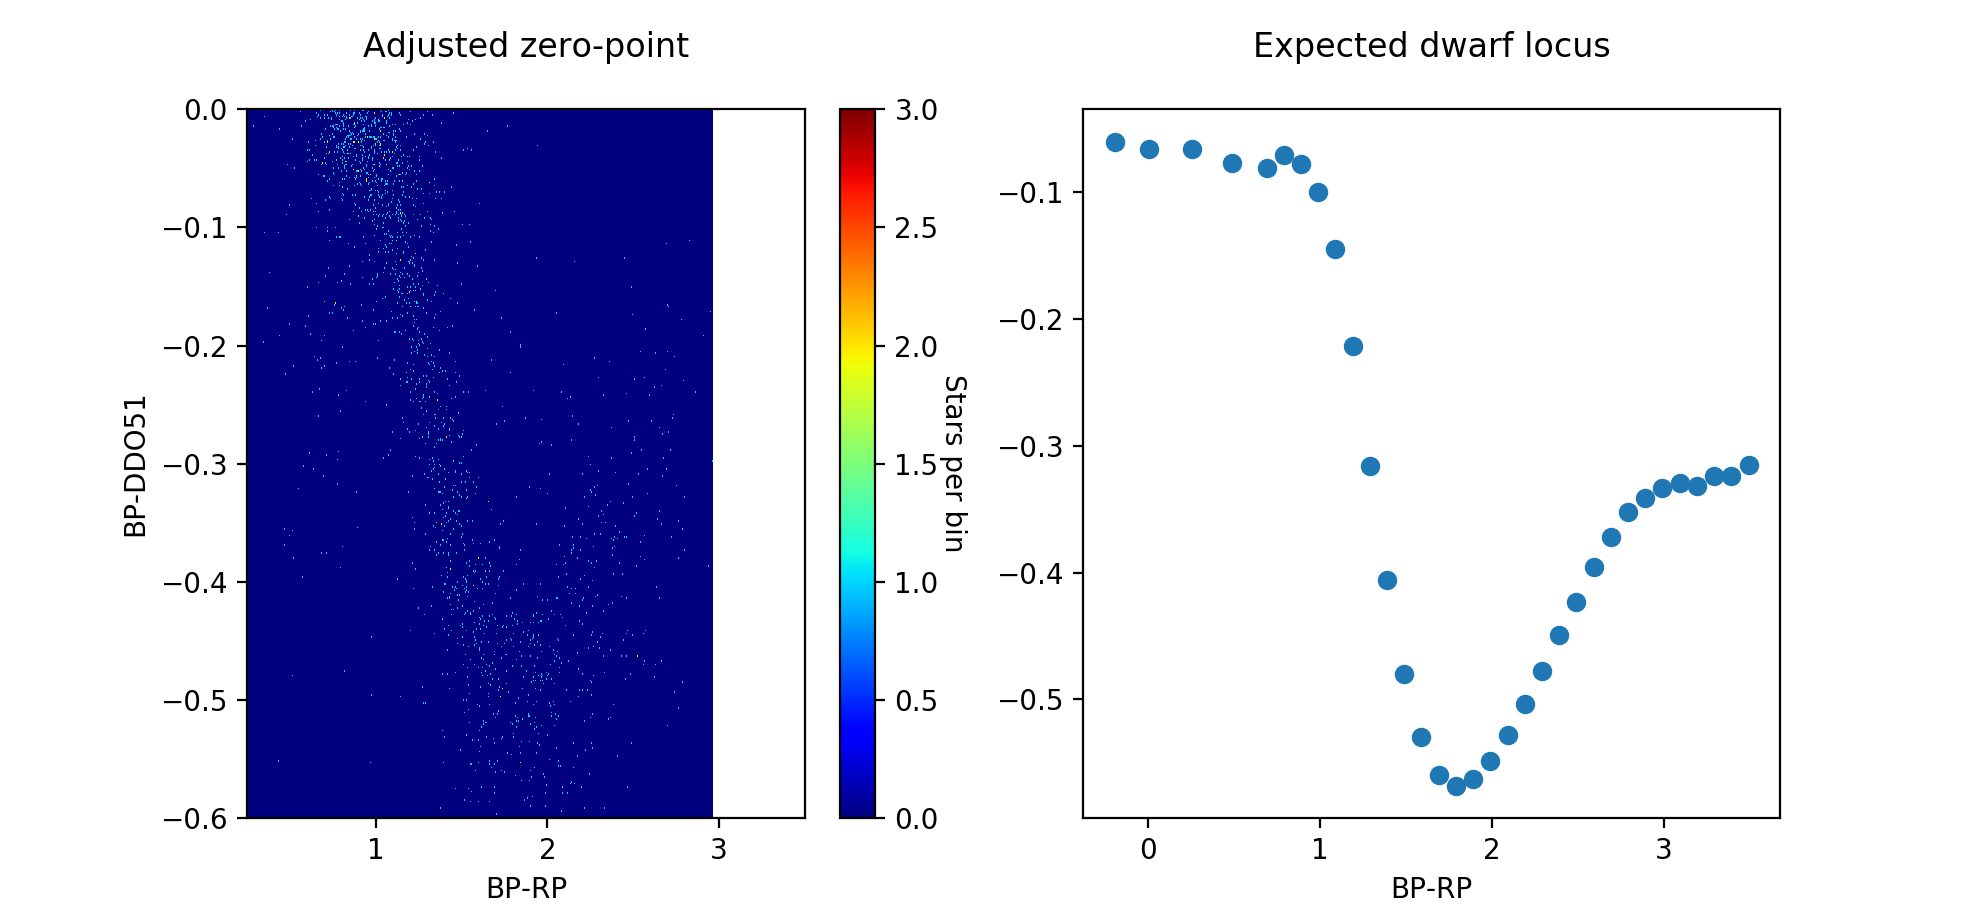

In [47]:
%matplotlib nbagg

#Load in Munn observation data
t1 = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\2017\g17d028\pcat\g17d028.003.h5')
t2 = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\2017\g17d028\pcat\g17d028.006.h5')
t3 = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\2017\g17d028\pcat\g17d028.007.h5')
t4 = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\2017\g17d028\pcat\g17d028.008.h5')
t5 = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\2017\g17d028\pcat\g17d028.009.h5')
t6 = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\2017\g17d028\pcat\g17d028.010.h5')
t7 = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\2017\g17d028\pcat\g17d028.011.h5')
t8 = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\2017\g17d028\pcat\g17d028.012.h5')
t9 = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\2017\g17d028\pcat\g17d028.013.h5')
t10 = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\2017\g17d028\pcat\g17d028.014.h5')
t11 = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\2017\g17d028\pcat\g17d028.015.h5')
t12 = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\2017\g17d028\pcat\g17d028.016.h5')

#Merge tables
t = np.concatenate((t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12))

#Load in expected dwarf locus
dat = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\gaiad51_dwarflocus.fits')

#Calculate differences between photometric bands
bprp = t['phot_bp_mean_mag']-t['phot_rp_mean_mag']
bpd = t['phot_bp_mean_mag']-t['ddo51']

#Create array with desired photometric data
dt = np.dtype([('bprp',float),('bpd',float)])
phot1 = np.zeros(len(t), dtype=dt)
phot1['bprp'] = bprp
phot1['bpd'] = bpd

#Remove bad values (equal to zero or greater than 100)
good = np.where((phot1['bprp']<3)&(phot1['bpd']<5)&(phot1['bprp']!=0)&(phot1['bpd']!=0))
phot1 = phot1[good]

x = phot1['bprp']
y = phot1['bpd']

plt.subplot(1, 2, 1)
plt.hist2d(x, y, (2000, 2000), cmap=plt.cm.jet)
cbar = plt.colorbar()
cbar.set_label('Stars per bin', rotation=270, labelpad=10)
plt.xlabel('BP-RP')
plt.ylabel('BP-DDO51')
plt.xlim(0.25,3.5)
plt.ylim(-0.6,0)
plt.title('Adjusted zero-point', y=1.05)

plt.subplot(1, 2, 2)
plt.plot(dat['BPRP'],dat['BPD'],'o')
plt.xlabel('BP-RP')
plt.title('Expected dwarf locus', y=1.05)

plt.show()

>### The DDO51 photometry appears to be calibrated correctly.  I will now apply my calibration function data to the data above to see if there is any difference.

In [42]:
def calibr(cat):
    # Import modules
    from astropy.io import fits
    import numpy as np
    from astropy.table import Table

    #Loading data from night one
    z = cat
    
    #Loading dwarf locus data
    dat = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\gaiad51_dwarflocus.fits')
    
    #Remove all nans from photometry
    ind = np.where((~np.isnan(z['phot_bp_mean_mag']))&(~np.isnan(z['phot_rp_mean_mag']))&(~np.isnan(z['ddo51'])))
    z = z[ind]

    #Zero-point data
    #Calculate differences between photometric bands
    bprp = z['phot_bp_mean_mag']-z['phot_rp_mean_mag']
    bpd = z['phot_bp_mean_mag']-z['ddo51']

    #Create array with desired photometric data
    dt = np.dtype([('bprp',float),('bpd',float)])
    zerop = np.zeros(len(z), dtype=dt)
    zerop['bprp'] = bprp
    zerop['bpd'] = bpd

    #Focus on values near the dwarf locus
    ind = np.where(zerop['bpd']<5)
    zerop = zerop[ind]
    hist, xedges, yedges = np.histogram2d(zerop['bprp'], zerop['bpd'], [50,50])
    ind = np.where(hist == hist.max())
    #Find the location of highest density in the locus
    x0 = xedges[ind[0]][0]
    y0 = yedges[ind[1]][0]
    good = np.where((zerop['bpd']<y0+0.15)&(zerop['bpd']>y0-0.68)&(zerop['bprp']<x0+2.17)&(zerop['bprp']>x0-0.574))

    #Determine the mean difference between expected BP-DDO51 and the BP-DDO51 in the observation file
    photint = np.interp(zerop['bprp'],dat['BPRP'],dat['BPD'])
    diff = zerop['bpd'] - photint
    m = np.mean(diff)

    #Adjusting DDO51 zero point
    mvec = [m]*len(z['ddo51'])
    z['ddo51'] += mvec

    return(z)

In [44]:
t = calibr(t)

<IPython.core.display.Javascript object>


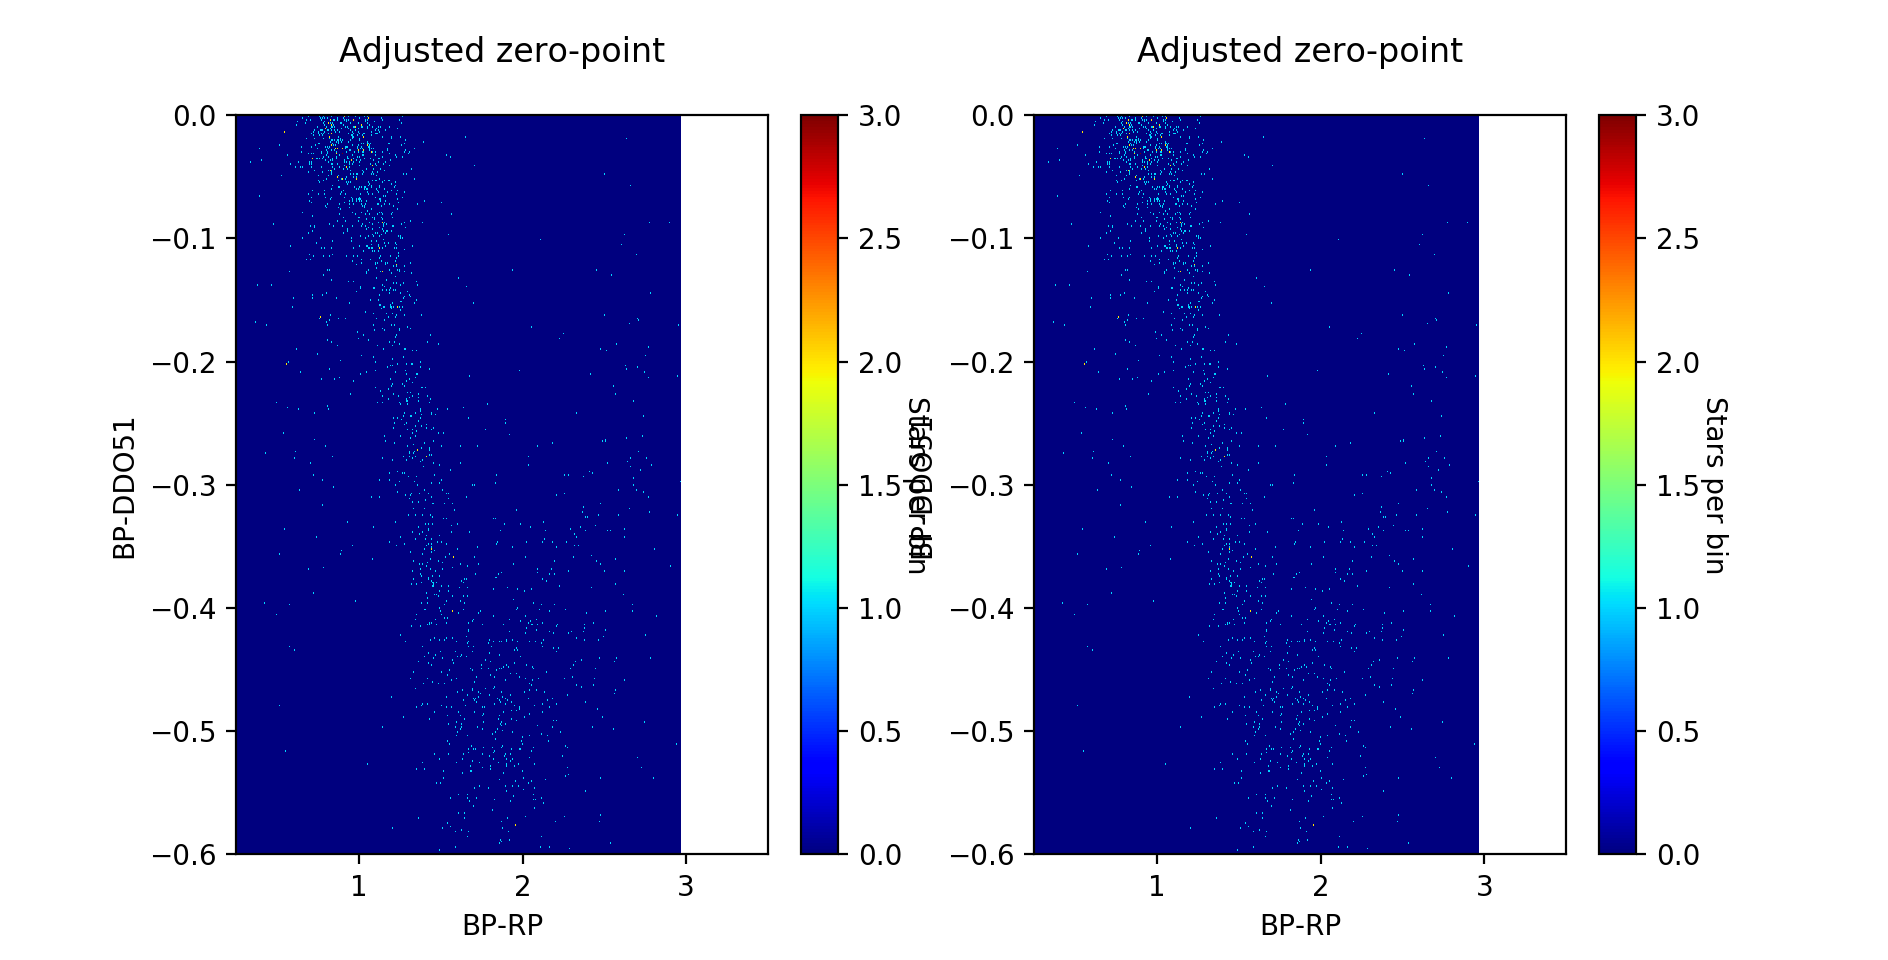

In [50]:
%matplotlib nbagg

#Load in expected dwarf locus
dat = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\gaiad51_dwarflocus.fits')

#Calculate differences between photometric bands
bprp = t['phot_bp_mean_mag']-t['phot_rp_mean_mag']
bpd = t['phot_bp_mean_mag']-t['ddo51']

#Create array with desired photometric data
dt = np.dtype([('bprp',float),('bpd',float)])
phot2 = np.zeros(len(t), dtype=dt)
phot2['bprp'] = bprp
phot2['bpd'] = bpd

#Remove bad values (equal to zero or greater than 100)
good = np.where((phot['bprp']<3)&(phot['bpd']<5)&(phot['bprp']!=0)&(phot['bpd']!=0))
phot = phot[good]

x1 = phot1['bprp']
y1 = phot1['bpd']

x2 = phot1['bprp']
y2 = phot1['bpd']

plt.subplot(1, 2, 1)
plt.hist2d(x1, y1, (2000, 2000), cmap=plt.cm.jet)
cbar = plt.colorbar()
cbar.set_label('Stars per bin', rotation=270, labelpad=10)
plt.xlabel('BP-RP')
plt.ylabel('BP-DDO51')
plt.xlim(0.25,3.5)
plt.ylim(-0.6,0)
plt.title('Adjusted zero-point', y=1.05)

plt.subplot(1, 2, 2)
plt.hist2d(x2, y2, (2000, 2000), cmap=plt.cm.jet)
cbar = plt.colorbar()
cbar.set_label('Stars per bin', rotation=270, labelpad=10)
plt.xlabel('BP-RP')
plt.ylabel('BP-DDO51')
plt.xlim(0.25,3.5)
plt.ylim(-0.6,0)
plt.title('Adjusted zero-point', y=1.05)

plt.show()